# Using the Model

To use the model, we must provide an architecture, workload, and a mapping.

## Unfused Mapping Example

The cell below loads a simple architecture, a chain of matrix multiplications,
and an unfused mapping.

In [1]:
import accelforge as af


spec = af.Spec.from_yaml(
    af.examples.arches.simple,
    af.examples.workloads.matmuls,
    af.examples.mappings.unfused_matmuls_to_simple,
    jinja_parse_data={"N_EINSUMS": 2, "M": 64, "KN": 32, "MainMemoryEnergy": 10}
)

The cell below displays a diagram of the architecture.

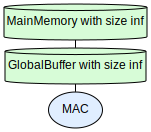

In [2]:
spec.arch

The cell below display the workload as a graph of Einsums.

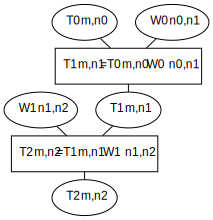

In [3]:
spec.workload

The cell below shows the LoopTree mapping.

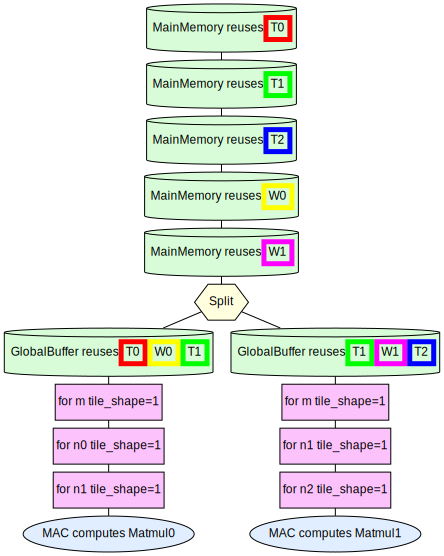

In [4]:
spec.mapping

In the cell below, we call the model.

In [5]:
result = spec.evaluate_mapping()
print("Energy:", result.energy())
print("Latency:", result.latency())
print()
print("Energy breakdown:")
print(result.energy(per_component=True))

Energy: 5062656.00000000
Latency: 131072.000000000

Energy breakdown:
{'GlobalBuffer': 4243456.00000000, 'MainMemory': 819200.000000000, 'MAC': 0}


AccelForge comes with some visualization tools. The cells below shows some examples.

/home/gilbertm/work/active/fastfusion/accelforge/plotting/mappings.py:164: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Figure size 640x480 with 1 Axes>,
 [<Axes: title={'center': '0-mapping0'}, ylabel='Energy (pJ)'>])

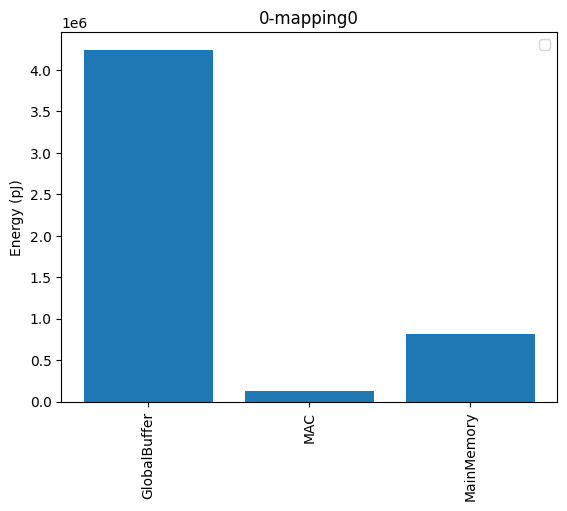

In [17]:
from accelforge.plotting.mappings import plot_energy_breakdown

plot_energy_breakdown([result], separate_by=["component"])

(<Figure size 640x480 with 1 Axes>,
 [<Axes: title={'center': '0-mapping0'}, ylabel='Energy (pJ)'>])

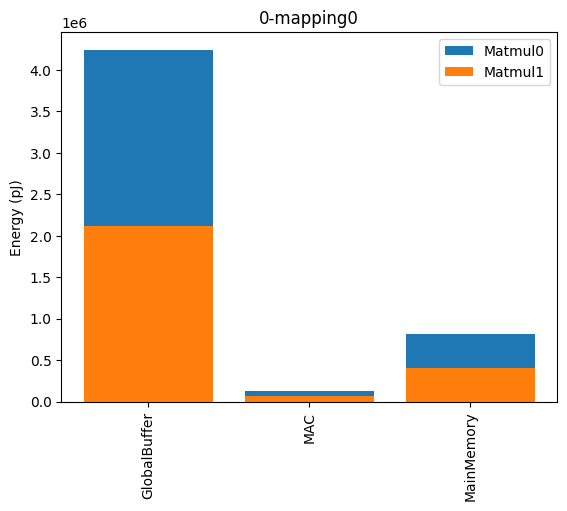

In [18]:
plot_energy_breakdown([result], separate_by=["component"], stack_by=["einsum"])

(<Figure size 640x480 with 1 Axes>,
 [<Axes: title={'center': '0-mapping0'}, ylabel='Energy (pJ)'>])

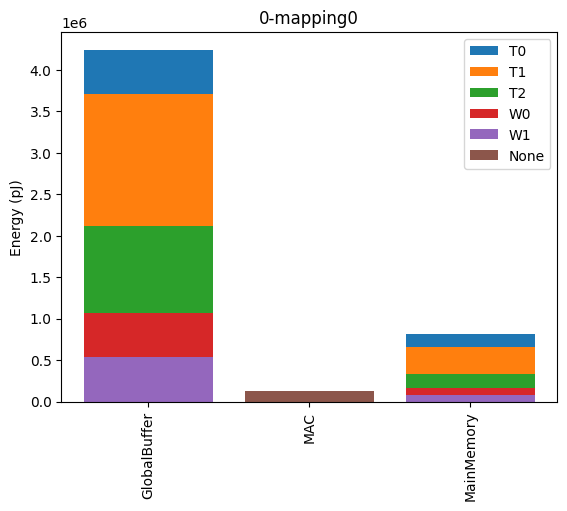

In [19]:
plot_energy_breakdown([result], separate_by=["component"], stack_by=["tensor"])

## Fused Mapping Example

We'll now parse in a simple fused mapping.

In [22]:
spec = af.Spec.from_yaml(
    af.examples.arches.simple,
    af.examples.workloads.matmuls,
    af.examples.mappings.fused_matmuls_to_simple,
    jinja_parse_data={"N_EINSUMS": 2, "M": 64, "KN": 32, "MainMemoryEnergy": 10}
)

The cell below shows the mapping, now fused.

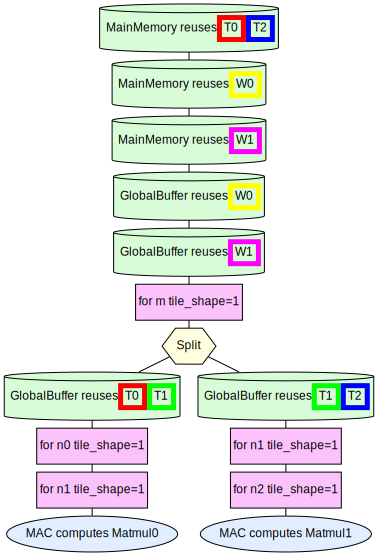

In [23]:
spec.mapping

We call the model as before:

In [24]:
fused_result = spec.evaluate_mapping()
print("Energy:", fused_result.energy())
print("Latency:", fused_result.latency())
print()
print("Energy breakdown:")
print(result.energy(per_component=True))

Energy: 4702208.00000000
Latency: 131072.000000000

Energy breakdown:
{'GlobalBuffer': 4243456.00000000, 'MainMemory': 819200.000000000, 'MAC': 0}


And we can visualize the results using the same functions.

/home/gilbertm/work/active/fastfusion/accelforge/plotting/mappings.py:164: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Figure size 640x480 with 1 Axes>,
 [<Axes: title={'center': '0-mapping0'}, ylabel='Energy (pJ)'>])

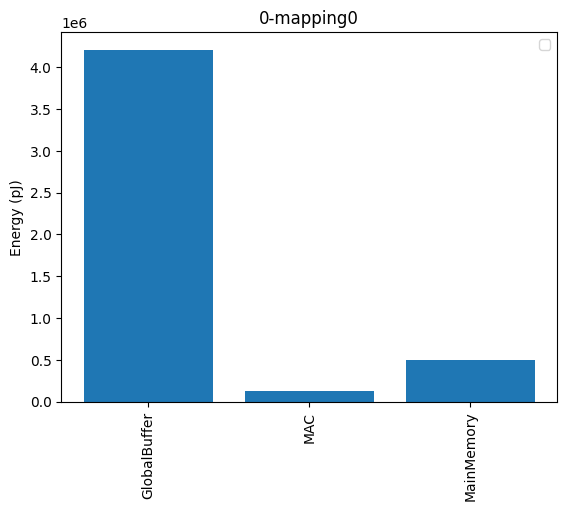

In [25]:
from accelforge.plotting.mappings import plot_energy_breakdown

plot_energy_breakdown([fused_result], separate_by=["component"])

(<Figure size 640x480 with 1 Axes>,
 [<Axes: title={'center': '0-mapping0'}, ylabel='Energy (pJ)'>])

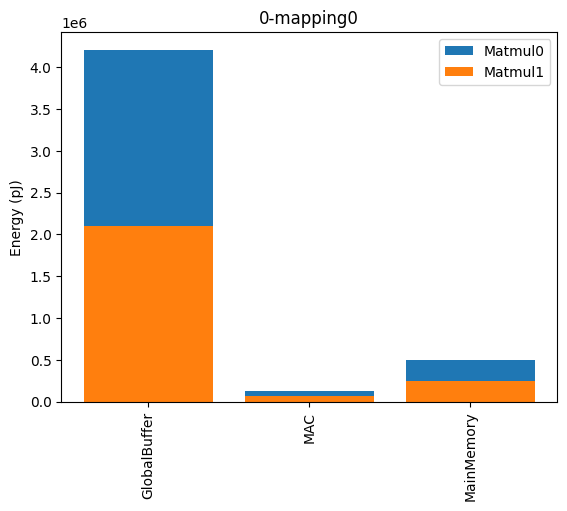

In [26]:
plot_energy_breakdown([fused_result], separate_by=["component"], stack_by=["einsum"])

(<Figure size 640x480 with 1 Axes>,
 [<Axes: title={'center': '0-mapping0'}, ylabel='Energy (pJ)'>])

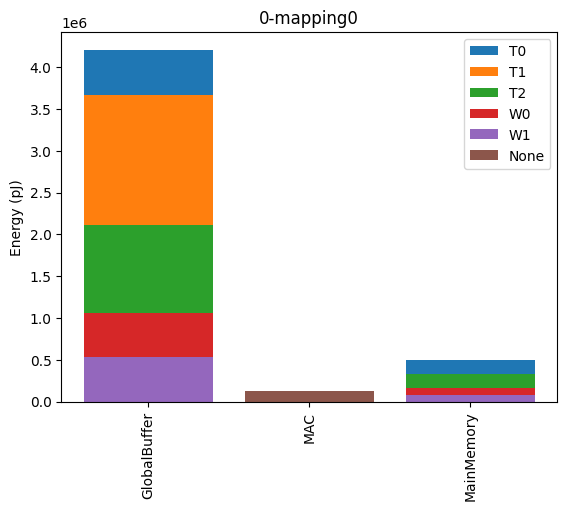

In [27]:
plot_energy_breakdown([fused_result], separate_by=["component"], stack_by=["tensor"])

Finally, we'll do an energy comparison between the unfused and fused mappings.

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'Unfused-mapping0'}, ylabel='Energy (pJ)'>,
        <Axes: title={'center': 'Fused-mapping0'}>], dtype=object))

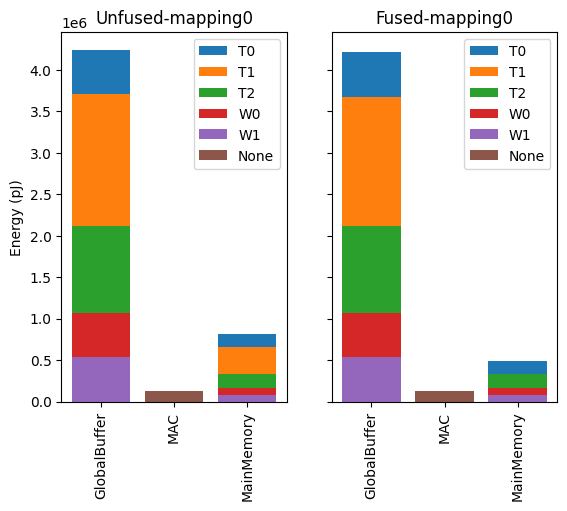

In [28]:
plot_energy_breakdown([result, fused_result], separate_by=["component"], stack_by=["tensor"], labels=["Unfused", "Fused"])